In [23]:
import pandas as pd
import os

current_dir = os.getcwd()

# Define the directory containing the simulated data
simulated_data_dir = current_dir+"\\test_simulations"  # Use double backslashes for Windows paths

# Check if the directory exists and get a list of CSV files in the directory
if os.path.exists(simulated_data_dir):
    files = [f for f in os.listdir(simulated_data_dir) if f.endswith('.csv')]
else:
    print("nothing found")
    files = []


files

['kalman_qi0p0021_qh0p0015_ni0p01_nh0p005_bh0p0001.csv',
 'kalman_qi0p0021_qh0p001_ni0p0001_nh0p0001_bh0p0002.csv',
 'kalman_qi0p0021_qh0p001_ni0p01_nh0p0005_bh0p0002.csv',
 'kalman_qi0p0021_qh0p001_ni0p01_nh0p001_bh0p0002.csv',
 'kalman_qi0p0021_qh0p001_ni0p01_nh0p001_bh0p0005.csv',
 'kalman_qi0p0021_qh0p001_ni0p01_nh0p005_bh0p0001.csv',
 'kalman_qi0p0021_qh0p003_ni0p01_nh0p0005_bh0p0001.csv',
 'kalman_qi0p0021_qh0p005_ni0p01_nh0p0005_bh0p0001.csv',
 'kalman_qi0_qh0p0005_ni0p001_nh0p0005_bh0p0002.csv',
 'kalman_qi0_qh0p0005_ni0p01_nh0p0005_bh0p0002.csv',
 'kalman_qi0_qh0p001_ni0p01_nh0p0005_bh0p0002.csv',
 'kalman_qi0_qh0_ni0p001_nh0p0005_bh0p0002.csv']

In [24]:
import re

def extract_parameters(filename):
    """
    Extract parameters from the filename and return them as a dictionary.
    """
    pattern = r"qi(\d+p\d+)_qh(\d+p\d+)_ni(\d+p\d+)_nh(\d+p\d+)_bh(\d+p\d+)"
    match = re.search(pattern, filename)
    if match:
        return {
            "filename": filename,
            "quantization_i": float(match.group(1).replace('p', '.')),
            "quantization_h": float(match.group(2).replace('p', '.')),
            "noise_std_i": float(match.group(3).replace('p', '.')),
            "noise_std_h": float(match.group(4).replace('p', '.')),
            "bias_h": float(match.group(5).replace('p', '.')),
        }
    return None

# Apply the function to the list of files and sort by parameters
files_with_params = [extract_parameters(f) for f in files if extract_parameters(f) is not None]
sorted_files = sorted(files_with_params, key=lambda x: (x["quantization_i"], x["quantization_h"], x["noise_std_i"], x["noise_std_h"], x["bias_h"]))

sorted_files_df = pd.DataFrame(sorted_files)

sorted_files_df

,filename,quantization_i,quantization_h,noise_std_i,noise_std_h,bias_h
0,kalman_qi0p0021_qh0p001_ni0p0001_nh0p0001_bh0p...,0.0021,0.0010,0.0001,0.0001,0.0002
1,kalman_qi0p0021_qh0p001_ni0p01_nh0p0005_bh0p00...,0.0021,0.0010,0.0100,0.0005,0.0002
2,kalman_qi0p0021_qh0p001_ni0p01_nh0p001_bh0p000...,0.0021,0.0010,0.0100,0.0010,0.0002
3,kalman_qi0p0021_qh0p001_ni0p01_nh0p001_bh0p000...,0.0021,0.0010,0.0100,0.0010,0.0005
4,kalman_qi0p0021_qh0p001_ni0p01_nh0p005_bh0p000...,0.0021,0.0010,0.0100,0.0050,0.0001
5,kalman_qi0p0021_qh0p0015_ni0p01_nh0p005_bh0p00...,0.0021,0.0015,0.0100,0.0050,0.0001
6,kalman_qi0p0021_qh0p003_ni0p01_nh0p0005_bh0p00...,0.0021,0.0030,0.0100,0.0005,0.0001
7,kalman_qi0p0021_qh0p005_ni0p01_nh0p0005_bh0p00...,0.0021,0.0050,0.0100,0.0005,0.0001


In [25]:
import matplotlib.pyplot as plt
# Use the index to select which file to open next
selected_index = 1  # Change this index to select a different file
selected_file = sorted_files_df.loc[selected_index, "filename"]

# open selected file as a pandas dataframe
selected_file_path = os.path.join(simulated_data_dir, selected_file)
print(f"Selected file path: {selected_file_path}")
# Read the CSV file into a DataFrame
df = pd.read_csv(selected_file_path, na_values=["NaN"])
df.head()

Selected file path: c:\Users\Bruno\STM32CubeIDE\workspace_1.16.0\Levitador_revancha\testing\test_simulations\kalman_qi0p0021_qh0p001_ni0p01_nh0p0005_bh0p0002.csv


,time,measured_current,measured_height,measured_speed,estimated_current,estimated_height,estimated_speed,real_current,real_height,real_speed,measured_u
0,0.000000e+00,1.1046,0.031,NaN,1.0986,0.025042,0.000909,1.0928,0.03,0.000000e+00,4.1529
1,3.155400e-30,1.1046,0.031,NaN,1.0987,0.025085,0.001818,1.0928,0.03,8.991500e-30,4.1733
2,5.000000e-05,1.1046,0.031,NaN,1.0924,0.025128,0.002739,1.0928,0.03,1.424900e-04,4.1733
3,1.000000e-04,1.0983,0.031,NaN,1.0925,0.025170,0.003653,1.0928,0.03,2.883700e-04,4.2049
4,1.500000e-04,1.0983,0.031,NaN,1.0893,0.025205,0.004418,1.0928,0.03,4.376700e-04,4.2490


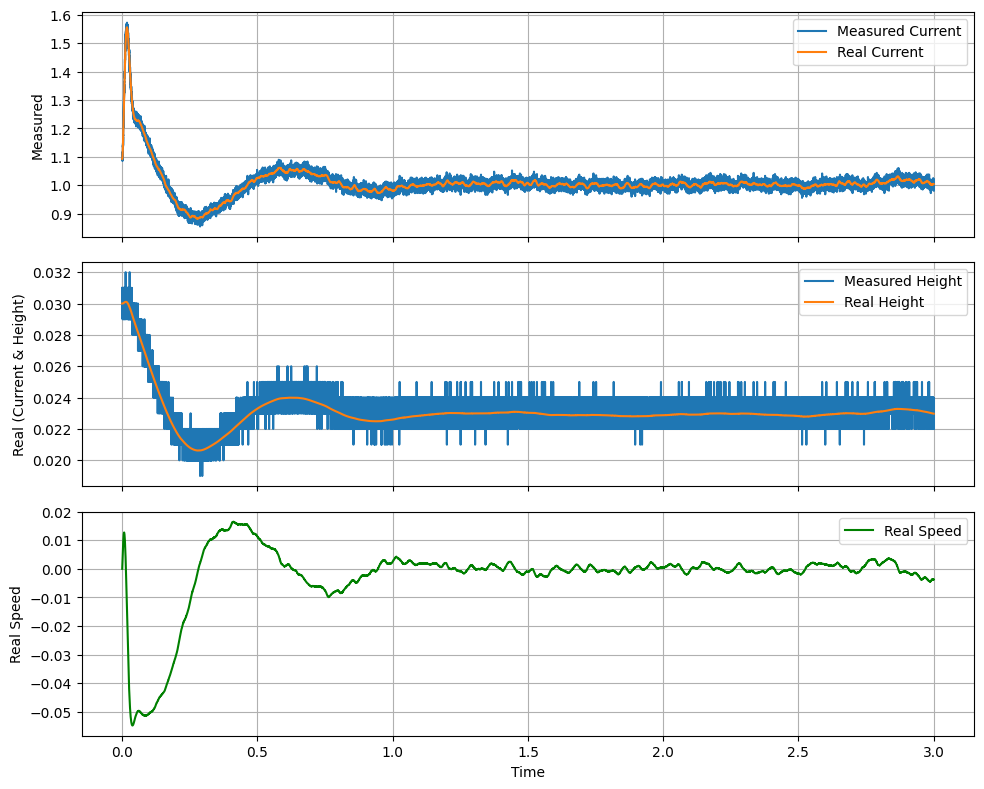

In [26]:

## Plotting stuff
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot 1: measured current and height
axs[0].plot(df['time'], df['measured_current'], label='Measured Current')
axs[0].plot(df['time'], df['real_current'], label='Real Current')
axs[0].set_ylabel("Measured")
axs[0].legend()
axs[0].grid(True)

# Plot 2: real current and height
axs[1].plot(df['time'], df['measured_height'], label='Measured Height')
axs[1].plot(df['time'], df['real_height'], label='Real Height')
axs[1].set_ylabel("Real (Current & Height)")
axs[1].legend()
axs[1].grid(True)

# Plot 3: real speed
axs[2].plot(df['time'], df['real_speed'], label='Real Speed', color='green')
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Real Speed")
axs[2].legend()
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def rough_kalman_no_control(y, x_hat, u=None):
    G = np.array([[0.988195, 0.0, 0.0],
                  [0.000000, 1.000004, 0.000100],
                  [-0.001783, 0.0784, 1.000004]])
    # H = np.array([[0.003106], [-0.0000], [-0.000003]])
    C = np.array([[1, 0, 0],
                  [0, 1, 0]])
    K = np.array([[0.999881277876667, -0.992773017041701],
                  [-0.000118722123333, 0.007226982958299],
                  [-0.002362645445556, 0.156316994328178]])
    
    x_hat = G @ x_hat
    x_hat = x_hat + K @ (y - C @ x_hat)
    return x_hat

def plot_results(df, results):
    """
    Plot the results of the estimator and compare them with the DataFrame.

    Parameters:
    - df: A pandas DataFrame containing the data.
    - results: A list of state vectors computed by the estimator.
    """
    # Create subplots
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    # Plot 1: measured current and height
    axs[0].plot(df['time'], df['measured_current'], label='Measured Current')
    axs[0].plot(df['time'], [r[0] for r in results], label='Kalman Current', linestyle='--')
    axs[0].plot(df['time'], df['real_current'], label='Real Current')
    axs[0].set_ylabel("Measured")
    axs[0].legend()
    axs[0].grid(True)

    # Plot 2: real current and height
    axs[1].plot(df['time'], df['measured_height'], label='Measured Height')
    axs[1].plot(df['time'], [r[1] for r in results], label='Kalman Height', linestyle='--')
    axs[1].plot(df['time'], df['real_height'], label='Real Height')
    axs[1].set_ylabel("Real (Current & Height)")
    axs[1].legend()
    axs[1].grid(True)

    # Plot 3: real speed vs results
    axs[2].plot(df['time'], df['real_speed'], label='Real Speed', color='green')
    axs[2].plot(df['time'], [r[2] for r in results], label='Kalman Speed', linestyle='--')
    axs[2].set_xlabel("Time")
    axs[2].set_ylabel("Real Speed")
    axs[2].legend()
    axs[2].grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

def run_estimator(estimator, df):
    """
    Run the given estimator function over the DataFrame and return the results.

    Parameters:
    - estimator: A function that takes y, x_hat, and u as inputs and returns the updated x_hat.
    - df: A pandas DataFrame containing the data.

    Returns:
    - results: A list of state vectors computed by the estimator.
    """
    # Initialize the state vector
    x_hat = np.array([1.09287, 0.025, 0]).T

    # Initialize the list to store the results
    results = []

    # Iterate over the DataFrame rows
    for i, h, u in zip(df['measured_current'], df['measured_height'], df['measured_u']):
        y = np.array([i, h]).T
        # Call the estimator function
        x_hat = estimator(y, x_hat, u)
        # Append the result to the list
        results.append(x_hat)

    return results

# Run the function with the rough_kalman_no_control estimator
results = run_estimator(rough_kalman_no_control, df)

# Call the function to plot the results
plot_results(df, results)

NameError: name 'df' is not defined

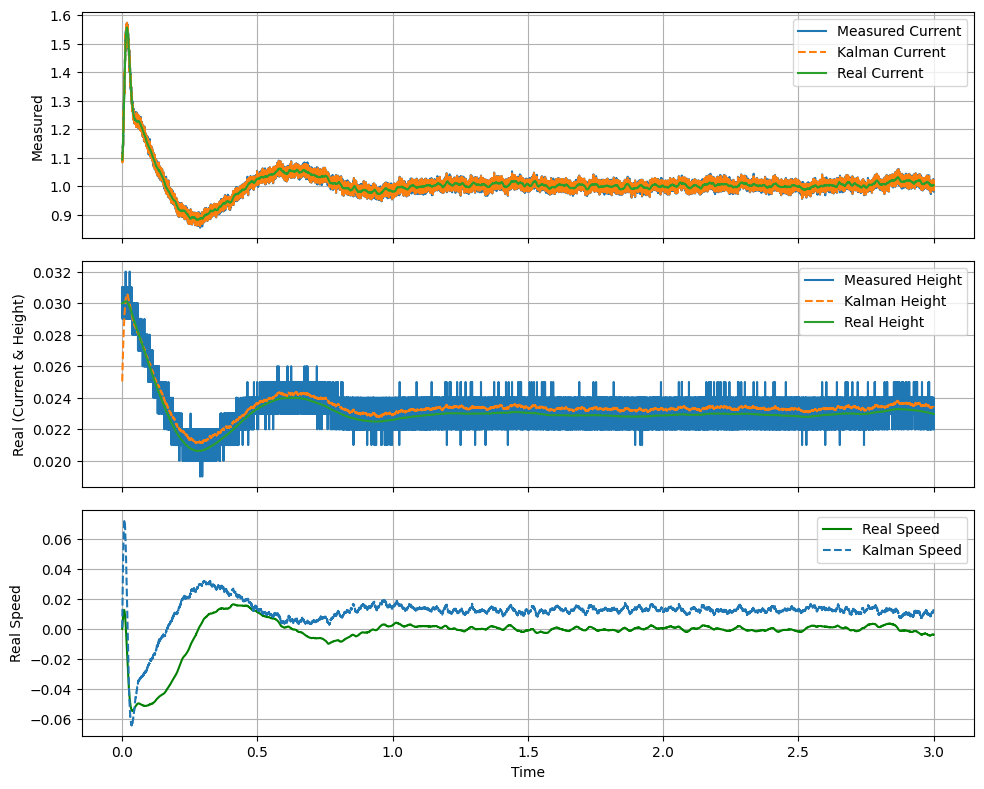

In [8]:
def rough_kalman(y, x_hat, u=None):
    G = np.array([[0.988195, 0.0, 0.0],
                  [0.000000, 1.000004, 0.000100],
                  [-0.001783, 0.0784, 1.000004]])
    C = np.array([[1, 0, 0],
                  [0, 1, 0]])
    H = np.array([0.003106, 0.0, -0.000003])
    K = np.array([[0.999881277876667, -0.992773017041701],
                  [-0.000118722123333, 0.007226982958299],
                  [-0.002362645445556, 0.156316994328178]])
    
    x_hat = G @ x_hat + H * u
    x_hat = x_hat + K @ (y - C @ x_hat)
    return x_hat

# Run the function with the rough_kalman estimator
results = run_estimator(rough_kalman, df)

plot_results(df, results)

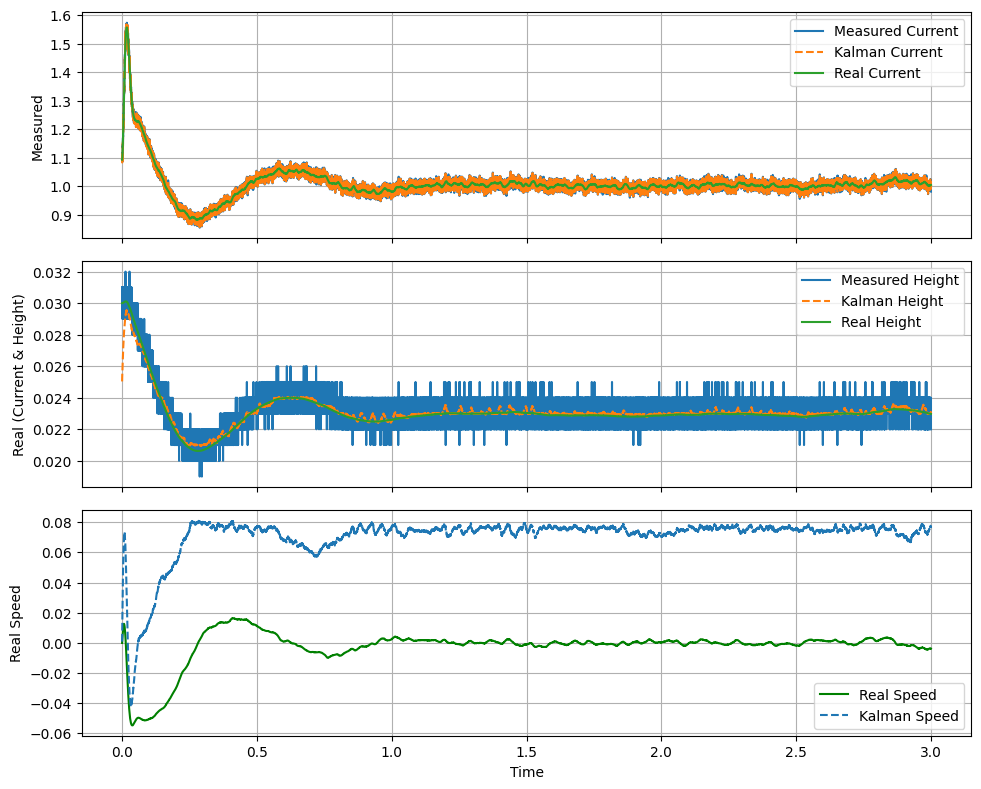

In [9]:

# constants
FRACTIONAL_BITS = 18
INTEGER_BITS = 2
WORD_LENGTH = FRACTIONAL_BITS + INTEGER_BITS

def float_to_fixed(f: float) -> int:
    """Convert a float to a fixed-point representation."""
    return int(f * (1 << FRACTIONAL_BITS))
    
def fixed_to_float(f: int) -> float:
    """Convert a fixed-point representation back to a float."""
    return f / (1 << FRACTIONAL_BITS)

def fixed_multiply(a: int, b: int) -> int:
    """Multiply two fixed-point numbers."""
    return (a * b) >> FRACTIONAL_BITS

def fixed_add(a: int, b: int) -> int:
    """Add two fixed-point numbers."""
    return a + b

def fixed_matmul(A, B):
    """Multiply two matrices in fixed-point."""
    m, n = len(A), len(B[0])
    n2, p = len(B), len(A[0])
    assert n == n2, "Incompatible dimensions for matrix multiplication"
    results = [[0] * n for _ in range(m)]
    for i in range(m):
        for j in range(n):
            results[i][j] = fixed_add(0, 0)
            for k in range(p):
                results[i][j] = fixed_add(results[i][j], fixed_multiply(A[i][k], B[k][j]))
    return results

def fixed_vec_matmul(mat, vec):
    """
    Multiply a fixed-point matrix by a fixed-point column vector.
    mat: m x n matrix (list of lists of int)
    vec: n x 1 vector (list of int)
    Returns: m x 1 vector (list of int)
    """
    m = len(mat)
    n = len(mat[0])
    assert len(vec) == n, "Incompatible sizes for matrix-vector multiplication"
    result = [0 for _ in range(m)]
    for i in range(m):
        acc = 0
        for j in range(n):
            acc = fixed_add(acc, fixed_multiply(mat[i][j], vec[j]))
        result[i] = acc
    return result

def fixed_vec_add(a, b):
    """
    Add two fixed-point vectors element-wise.
    a, b: vectors (list of int) of the same length
    Returns: vector (list of int)
    """
    assert len(a) == len(b), "Vectors must be the same length"
    return [fixed_add(x, y) for x, y in zip(a, b)]

def fixed_point_kalman(y, x_hat, u):
    G = np.array([[0.988195, 0.0, 0.0],
                [0.000000, 1.000004, 0.000100],
                [-0.001783, 0.0784, 1.000004]])
    C = np.array([[-1, 0, 0],
                [0, -1, 0]])
    H = np.array([0.003106, 0.0, -0.000003])
    K = np.array([[0.999881277876667, -0.992773017041701],
                [-0.000118722123333, 0.007226982958299],
                [-0.002362645445556, 0.156316994328178]])
    G_fixed = [[float_to_fixed(v) for v in row] for row in G]
    C_fixed = [[float_to_fixed(v) for v in row] for row in C]
    H_fixed = [float_to_fixed(v) for v in H]
    K_fixed = [[float_to_fixed(v) for v in row] for row in K]

    # Convert y and x_hat to fixed-point
    y_fixed = [float_to_fixed(v) for v in y]
    x_hat_fixed = [float_to_fixed(v) for v in x_hat]
    # u_fixed = float_to_fixed(u)

    x_hat = fixed_vec_matmul(G_fixed, x_hat_fixed)

    z = fixed_vec_add(y_fixed, fixed_vec_matmul(C_fixed, x_hat))
    x_hat = fixed_vec_add(x_hat, fixed_vec_matmul(K_fixed, z))
    # # Convert the result back to float
    x_hat_float = [fixed_to_float(v) for v in x_hat]
    
    
    # x_hat = G @ x_hat + H * u
    # x_hat = x_hat + K @ (y - C @ x_hat)
    # return x_hat
    return np.array(x_hat_float)
    
# Run the function with the fixed_point_kalman estimator
results = run_estimator(fixed_point_kalman, df)
# Call the function to plot the results
plot_results(df, results)
